# Brain Stroke Dataset -Solution

In [8]:
import pandas as pd
import numpy as np

In [20]:
# reading the csv files
df = pd.read_csv("brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [22]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [23]:
import matplotlib.pyplot as plt

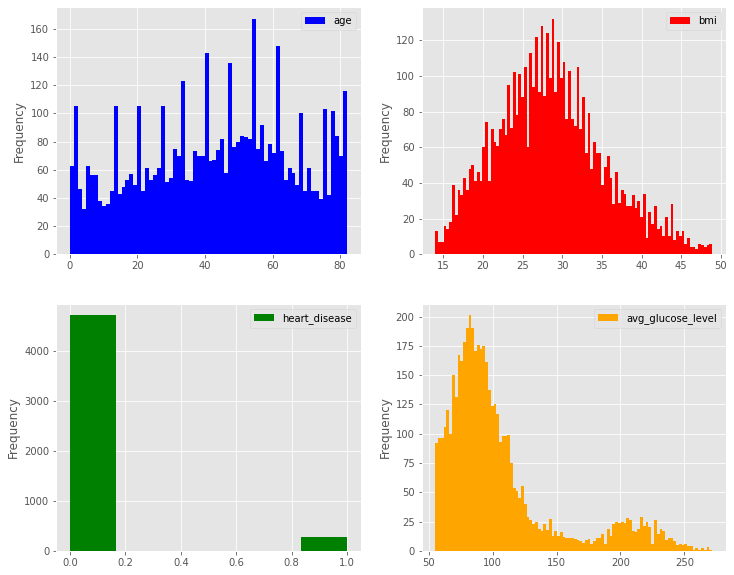

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

* We have good distribution for age 
* I think we have outliers in bmi 
* Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , that may be not good this feature will not be helpful to know if diabetes have correlation between diabetes and strokes

**Check for missing values** 

In [25]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  4981
Columns  :  11

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   0

Unique values :  
 gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64


# Data Visualization

**Stroke Pie Chart**

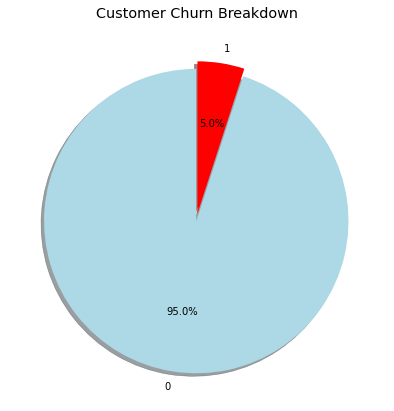

In [26]:

labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

* Only 5% percent of people have Stroke ! 


In [31]:
import seaborn as sns

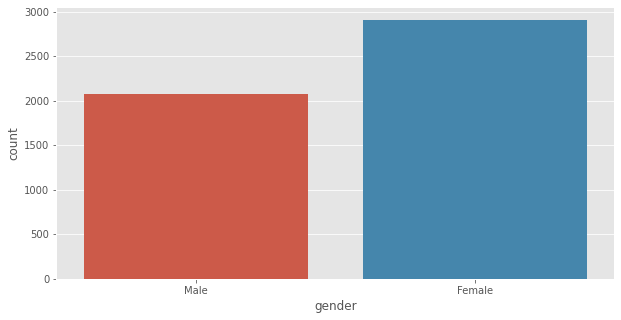

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

* There is about 1000 diffrence between Female and Male in the data 

**Heatmap Correlation**

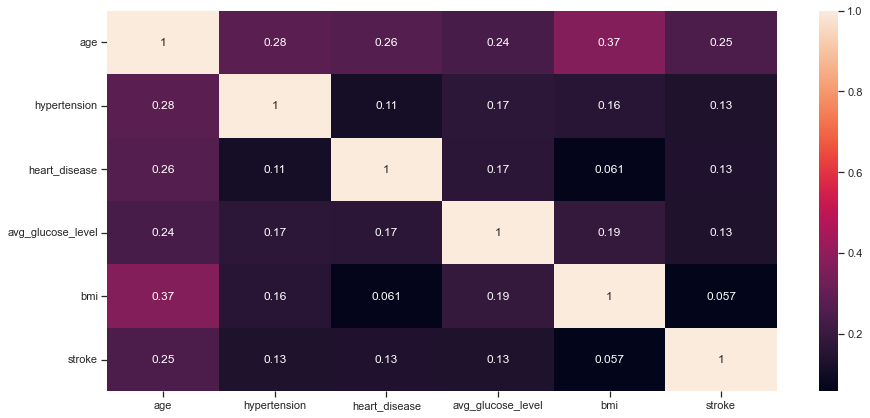

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

**BMI Boxplot**

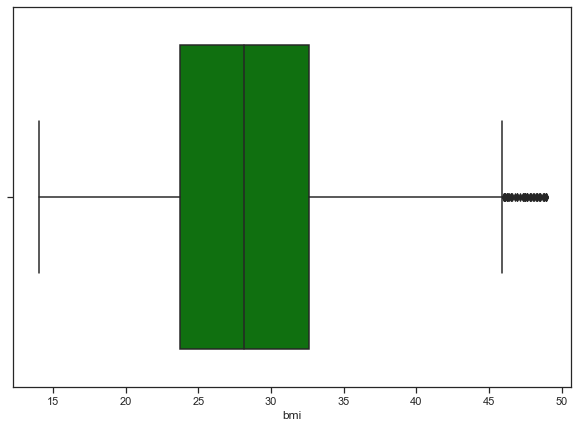

In [37]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

 
* Body mass index is a value derived from the mass and height of a person



In [40]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape

(0,)

In [41]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


**Stroke or not in Categorical Features**

In [43]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2767  140
               Male             1966  108
Residence_type Rural            2336  113
               Urban            2397  135
smoking_status Unknown          1453   47
               formerly smoked   797   70
               never smoked     1749   89
               smokes            734   42

**Stroke/Ever Married**

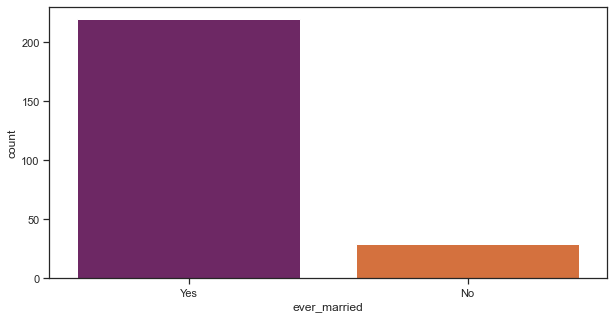

In [44]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

**Stroke/Work Type**

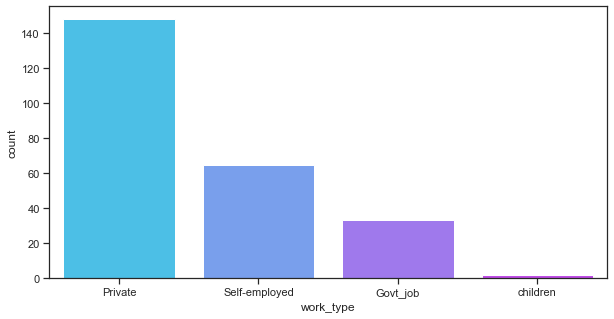

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

* Private work exposes you to more stroke

**Stroke/Smoking Status**

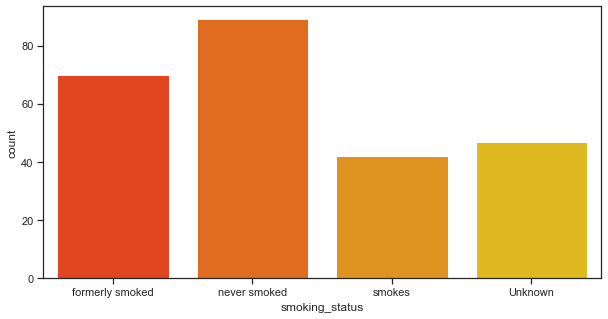

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

* Being a smoker or a formerly smoker increases your risk of having a stroke

**Residence Type**

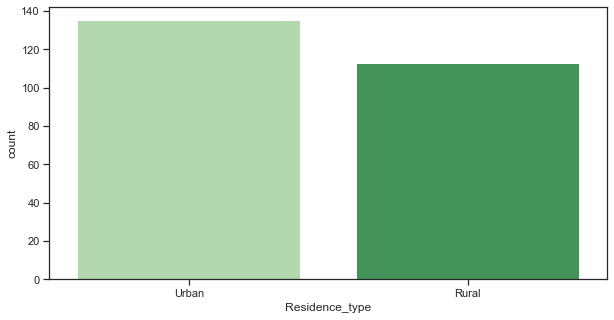

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');

* Residence Type has nothing to do with stroke, We cannot take it as a standard


**Stroke/Heart Disease**

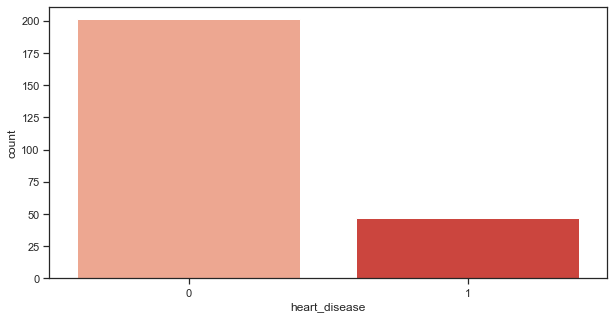

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

* Most people who have had a stroke do not have any heart disease, but that does not prevent it being an influential factor 

**Hypertension**

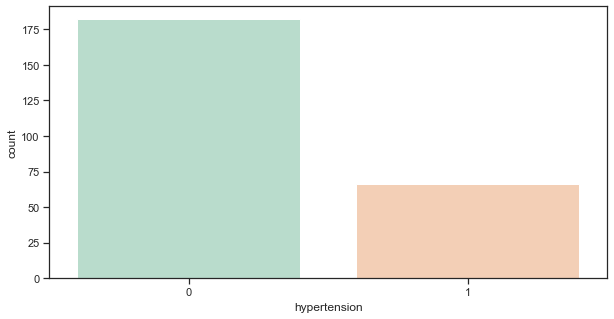

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

* more than 25% of strok cases They had hypertension

# Data preprocessing

**Encoding Categorical Features**

In [51]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])


In [52]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,1,0,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1,0,1,0,0
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,0,0,1,0,0,0,1,0,0
4977,1,40.0,0,0,1,1,191.15,31.1,0,0,0,0,1,0,1,0,0
4978,0,45.0,1,0,1,0,95.02,31.8,0,0,0,0,1,1,0,0,0
4979,1,40.0,0,0,1,0,83.94,30.0,0,0,0,0,1,0,1,0,0


**Scaling The variance in Features**

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [56]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age
0,1,0,1,1,1,1,0,1,0,0,0,1,0,0,2.723411,1.193238,1.040584
1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,-0.000523,0.589390,1.614270
2,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1.448529,0.869222,0.246250
3,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1.512650,-0.662492,1.570141
4,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1.780895,0.073909,1.658400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,0,0,0,0,0,1,0,0,0,1,0,0,-0.794162,0.191733,-0.106788
4977,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1.890500,0.383197,-0.150917
4978,0,1,0,1,0,0,0,0,0,1,1,0,0,0,-0.242364,0.486294,0.069731
4979,1,0,0,1,0,0,0,0,0,1,0,1,0,0,-0.488199,0.221189,-0.150917


**Drop ID feature and check for nulls**

In [64]:
# check the missing values 
df.isnull().sum().sort_values(ascending=False)/len(df)

gender                            0.0
smoking_status_smokes             0.0
bmi                               0.0
avg_glucose_level                 0.0
work_type_children                0.0
work_type_Self-employed           0.0
work_type_Private                 0.0
work_type_Govt_job                0.0
smoking_status_never smoked       0.0
hypertension                      0.0
smoking_status_formerly smoked    0.0
smoking_status_Unknown            0.0
stroke                            0.0
Residence_type                    0.0
ever_married                      0.0
heart_disease                     0.0
age                               0.0
dtype: float64

# Classification Models

**Target & Features**

In [65]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

**Splitting**

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**SVM**

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [104]:

svc = SVC(random_state=0)
svc.fit(X_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.9463568559954102
Testing Score 
 0.9591973244147157
[[1434    0]
 [  61    0]]


**Random Forest Classifier**

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [106]:
forest = RandomForestClassifier(n_estimators = 100)
#== 
forest.fit(X_train, y_train)
#== 
#Score 
#== 
forest_score = forest.score(X_train, y_train)
forest_test = forest.score(X_test, y_test)
#== 
#testing model 
#== 
y_pred = forest.predict(X_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 1.0
Testing Score 
 0.9558528428093646
[[1429    5]
 [  61    0]]


**Logistic Regression**

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [108]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

Testing Score 
 0.959866220735786
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.02      0.03        61

    accuracy                           0.96      1495
   macro avg       0.98      0.51      0.51      1495
weighted avg       0.96      0.96      0.94      1495

[[1434    0]
 [  60    1]]


# Read AND Explore

In [109]:
# reading the csv files
df = pd.read_csv("brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [111]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


**Variance feature distribution**

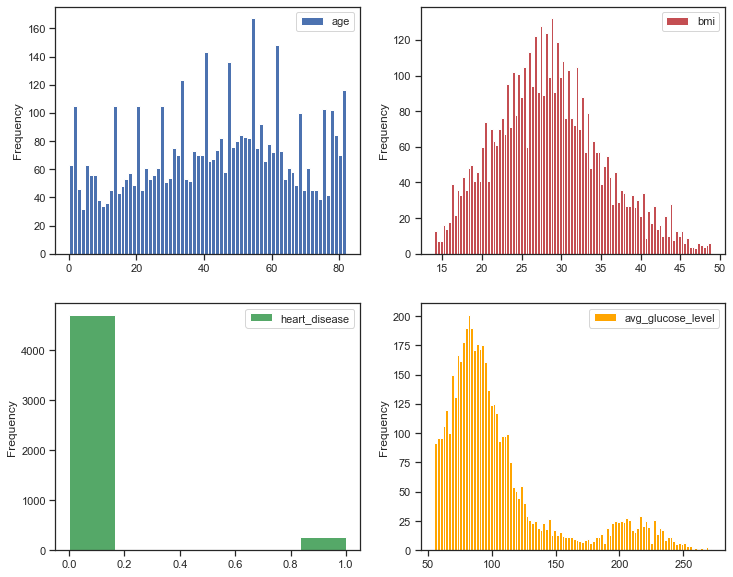

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

* We have good distribution for age 
* I think we have outliers in bmi 
* Avg glucose distribution is reasonable because the normal avg of blood in sugar is less than 140 , that may be not good this feature will not be helpful to know if diabetes have correlation between diabetes and strokes

**Check for missing values**

In [113]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  4981
Columns  :  11

Features : 
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   0

Unique values :  
 gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64


**Feature Importance using Logistic Regression**

In [114]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.13538365332250124, 0.48653488826702, 0.33544148511412963, 0.3620805152778474, 0.02150348419185203, 0.04864257468864524, 0.02011118960102175, 0.31294493001150053, 0.2827368083853402, 0.006834658552727544, 0.09625254408203907, 0.47229396104473437, 0.5600351100355149, 0.1410664338990043, 0.15019265941377669, 1.6685766003352869]


In [118]:
cols = list(df.columns)
cols.index('stroke')
#== 
#Delete target label 
#== 
del cols[5]
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

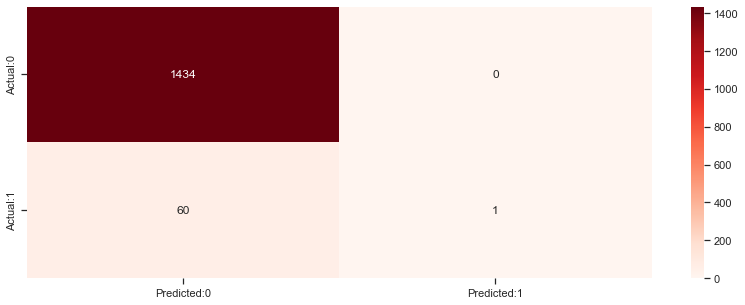

In [119]:
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

In [120]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [121]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n')

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.959866220735786 
 The Missclassification = 1-Accuracy =                   0.04013377926421402 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.01639344262295082 
 Specificity or True Negative Rate = TN/(TN+FP) =        1.0 



* The negative cases are predicted more accurately than the positives.